## A short introduction to machine learning

This section is adapted from the [quick start tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) from the scikit-learn documentation.

In general, a learning problem considers a set of N samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

Typical machine learning tasks are :
- **classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. For example, given examples of pixels belonging to an object of interest and background, we want the algorithm to label all the other pixels of the image. Or given images of cats and dogs, we want to label automatically images whether they show cats or dogs.
- **clustering**: grouping together similar samples. For example, given a set of pictures, can we group them automatically by suject (e.g. people, monuments, animals...)?

In image processing, a sample can either be
- a whole image, its features being pixel values, or sub-regions of an image (e.g. for face detection)
- a pixel, its features being intensity values in colorspace, or statistical information about a neighbourhood centered on the pixel,
- a labeled region, e.g. for classifying particles in an image of labels

The only requirement is to create a dataset composed of N samples, of m features each, which can be passed to the **estimators** of scikit-learn.

Let us start with an example, using the **digits dataset** from scikit-learn.

In [0]:
from sklearn import datasets
from matplotlib import pyplot as plt

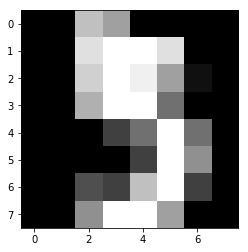

In [8]:
digits = datasets.load_digits()
plt.imshow(digits.images[5], cmap='gray')

The dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the ``.data`` member, which is a ``n_samples, n_features`` array. Response variables (if available, as here) are stored in the ``.target member.``

In [0]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


From the shape of the ``data`` array, we see that there are 1797 samples, each having 64 features. In fact, these 64 pixels are the raveled values of an 8x8 image. For convenience, the 2D images are also provided as in the ``.images`` member. In a machine learning problem, a sample always consists of a **flat array** of features, which sometimes require reshaping data.


In [0]:
import numpy as np
print(digits.images.shape)
np.all(digits.data[0].reshape((8, 8)) == digits.images[0])

(1797, 8, 8)


True

target:  0


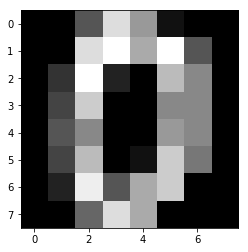

In [0]:
plt.imshow(digits.images[0], cmap='gray')
print("target: ", digits.target[0])

We now use one of scikit-learn's estimators classes in order to predict the digit from an image. 

Here we use an SVC (support vector machine classification) classifier, which uses a part of the dataset (the **training set**) to find the best way to separate the different classes. Even without knowing the details of the SVC, we can use it as a black box thanks to the common estimator API of scikit-learn. An estimator is created by initializing an estimator object: 

In [0]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

The estimator is trained from the learning set using its ``.fit`` method.

In [0]:
clf.fit(digits.data[:-10], digits.target[:-10])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Then the target value of new data is predicted using the ``.predict`` method of the estimator.

[9 8]


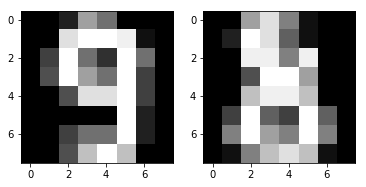

In [0]:
print(clf.predict(digits.data[-2:]))
fig, axes = plt.subplots(1, 2)
axes[0].imshow(digits.images[-2], cmap='gray')
axes[1].imshow(digits.images[-1], cmap='gray')

use different kinds of samples and features, starting from low-level pixel-based features (e.g. RGB color), to mid-level features (e.g. corner, patches of high contrast), and finally to properties of segmented regions. 
